## Observations and Insights 

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer")
# Display the data table for preview
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [85]:
# Checking the number of mice.

len(mouse_df["Mouse ID"].unique())

249

In [86]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_df.loc[mouse_df[["Mouse ID","Timepoint"]].duplicated(keep=False),:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [87]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_df.loc[(mouse_df["Mouse ID"] == "g989"),:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [88]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# mouse_df.set_index("Mouse ID")
mouse_cleaned_df = mouse_df.loc[(mouse_df["Mouse ID"] != "g989"),:]
mouse_cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [89]:
# Checking the number of mice in the clean DataFrame.
len(mouse_cleaned_df["Mouse ID"].unique())

248

## Summary Statistics

In [142]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen

# Create tumor volume series
tv = mouse_cleaned_df["Tumor Volume (mm3)"]

tv_mean = np.mean(tv)
tv_median = np.median(tv)
tv_var = np.var(tv,ddof=0)
tv_sd = np.std(tv,ddof=0)
tv_sem = sem(tv)

tumor_summ_df = pd.DataFrame({
    "Tumor Volume Stats":["Mean", "Median", "Variance", "Std Dev", "SEM"],
    "Value":[tv_mean,tv_median,tv_var,tv_sd,tv_sem]})
print("-----ALL DRUG REGIMES TUMOR VOLUME SUMMARY STATISTICS----")
print(tumor_summ_df)
print("---------------------------------\n")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_and_vol = mouse_cleaned_df[["Drug Regimen","Tumor Volume (mm3)"]]
drug_and_vol
group_by_regimen_df = drug_and_vol.groupby(["Drug Regimen"])
summary_df =pd.DataFrame({})
summary_df["Mean"] = group_by_regimen_df["Tumor Volume (mm3)"].mean()
summary_df["Median"] = group_by_regimen_df["Tumor Volume (mm3)"].median()
summary_df["Variance"]=group_by_regimen_df["Tumor Volume (mm3)"].var()
summary_df["Std Dev"]=group_by_regimen_df["Tumor Volume (mm3)"].std()
summary_df["SEM"]=group_by_regimen_df["Tumor Volume (mm3)"].sem()
print("-----TUMOR SUMMARY STATISTICS BY DRUG REGIMEN----")
summary_df

-----ALL DRUG REGIMES TUMOR VOLUME SUMMARY STATISTICS----
  Tumor Volume Stats      Value
0               Mean  50.435293
1             Median  48.933454
2           Variance  79.420640
3            Std Dev   8.911826
4                SEM   0.205591
---------------------------------

-----TUMOR SUMMARY STATISTICS BY DRUG REGIMEN----


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<AxesSubplot:ylabel='Drug Regimen'>

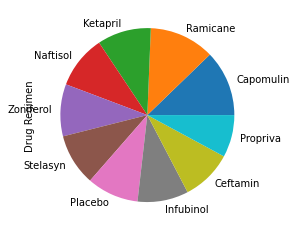

In [157]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measure_by_regimen = mouse_cleaned_df["Drug Regimen"].value_counts()
measure_by_regimen.plot(kind="pie")

<BarContainer object of 10 artists>

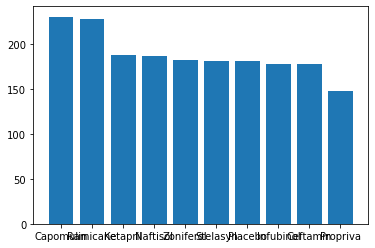

In [181]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measure_by_regimen = mouse_cleaned_df["Drug Regimen"].value_counts()


# measure_by_regimen_df.head()
measure_by_regimen_df

x_axis = measure_by_regimen_df.keys()
y_axis = measure_by_regimen_df.tolist()

plt.bar(x_axis,y_axis)

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
